# **PHISHGUARD: A Comprehensive Framework for Phishing Website Detection Using Machine Learning and Ensemble Models**

# Importing Required Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Filter warnings
warnings.filterwarnings('ignore')

## Dataset 06

## need to update
The dataset is borrowed from [Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .](https://archive.ics.uci.edu/dataset/327/phishing+websites)

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

## need to update
- samples: 10000
- features: 48

In [31]:
#Loading data into dataframe

file_path = '../data/dataset6.csv'
data1 = pd.read_csv(file_path)


In [32]:
data1.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [33]:
data1.shape

(10000, 50)

In [34]:
list(data1.columns)

['id',
 'NumDots',
 'SubdomainLevel',
 'PathLevel',
 'UrlLength',
 'NumDash',
 'NumDashInHostname',
 'AtSymbol',
 'TildeSymbol',
 'NumUnderscore',
 'NumPercent',
 'NumQueryComponents',
 'NumAmpersand',
 'NumHash',
 'NumNumericChars',
 'NoHttps',
 'RandomString',
 'IpAddress',
 'DomainInSubdomains',
 'DomainInPaths',
 'HttpsInHostname',
 'HostnameLength',
 'PathLength',
 'QueryLength',
 'DoubleSlashInPath',
 'NumSensitiveWords',
 'EmbeddedBrandName',
 'PctExtHyperlinks',
 'PctExtResourceUrls',
 'ExtFavicon',
 'InsecureForms',
 'RelativeFormAction',
 'ExtFormAction',
 'AbnormalFormAction',
 'PctNullSelfRedirectHyperlinks',
 'FrequentDomainNameMismatch',
 'FakeLinkInStatusBar',
 'RightClickDisabled',
 'PopUpWindow',
 'SubmitInfoToEmail',
 'IframeOrFrame',
 'MissingTitle',
 'ImagesOnlyInForm',
 'SubdomainLevelRT',
 'UrlLengthRT',
 'PctExtResourceUrlsRT',
 'AbnormalExtFormActionR',
 'ExtMetaScriptLinkRT',
 'PctExtNullSelfRedirectHyperlinksRT',
 'CLASS_LABEL']

In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [36]:
# nunique value in columns

data1.nunique()

id                                    10000
NumDots                                  17
SubdomainLevel                           13
PathLevel                                18
UrlLength                               226
NumDash                                  25
NumDashInHostname                        10
AtSymbol                                  2
TildeSymbol                               2
NumUnderscore                            16
NumPercent                               14
NumQueryComponents                       19
NumAmpersand                             16
NumHash                                   2
NumNumericChars                          82
NoHttps                                   2
RandomString                              2
IpAddress                                 2
DomainInSubdomains                        2
DomainInPaths                             2
HttpsInHostname                           1
HostnameLength                           74
PathLength                      

In [37]:
# We can see that there are no missing values in the Dataset
for col in data1.columns:
    unique_value_list = data1[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data1[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

id has 10000 unique values
NumDots has 17 unique values
SubdomainLevel has 13 unique values
PathLevel has 18 unique values
UrlLength has 226 unique values
NumDash has 25 unique values
NumDashInHostname contains:			[0 1 2 4 3 5 7 6 9 8]
AtSymbol contains:			[0 1]
TildeSymbol contains:			[0 1]
NumUnderscore has 16 unique values
NumPercent has 14 unique values
NumQueryComponents has 19 unique values
NumAmpersand has 16 unique values
NumHash contains:			[0 1]
NumNumericChars has 82 unique values
NoHttps contains:			[1 0]
RandomString contains:			[0 1]
IpAddress contains:			[0 1]
DomainInSubdomains contains:			[0 1]
DomainInPaths contains:			[0 1]
HttpsInHostname contains:			[0]
HostnameLength has 74 unique values
PathLength has 147 unique values
QueryLength has 164 unique values
DoubleSlashInPath contains:			[0 1]
NumSensitiveWords contains:			[0 1 2 3]
EmbeddedBrandName contains:			[0 1]
PctExtHyperlinks has 2510 unique values
PctExtResourceUrls has 1489 unique values
ExtFavicon contains:

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [38]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling
data1 = data1.drop(data1.columns[0],axis=1)
data1

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [39]:
#description of dataset

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0


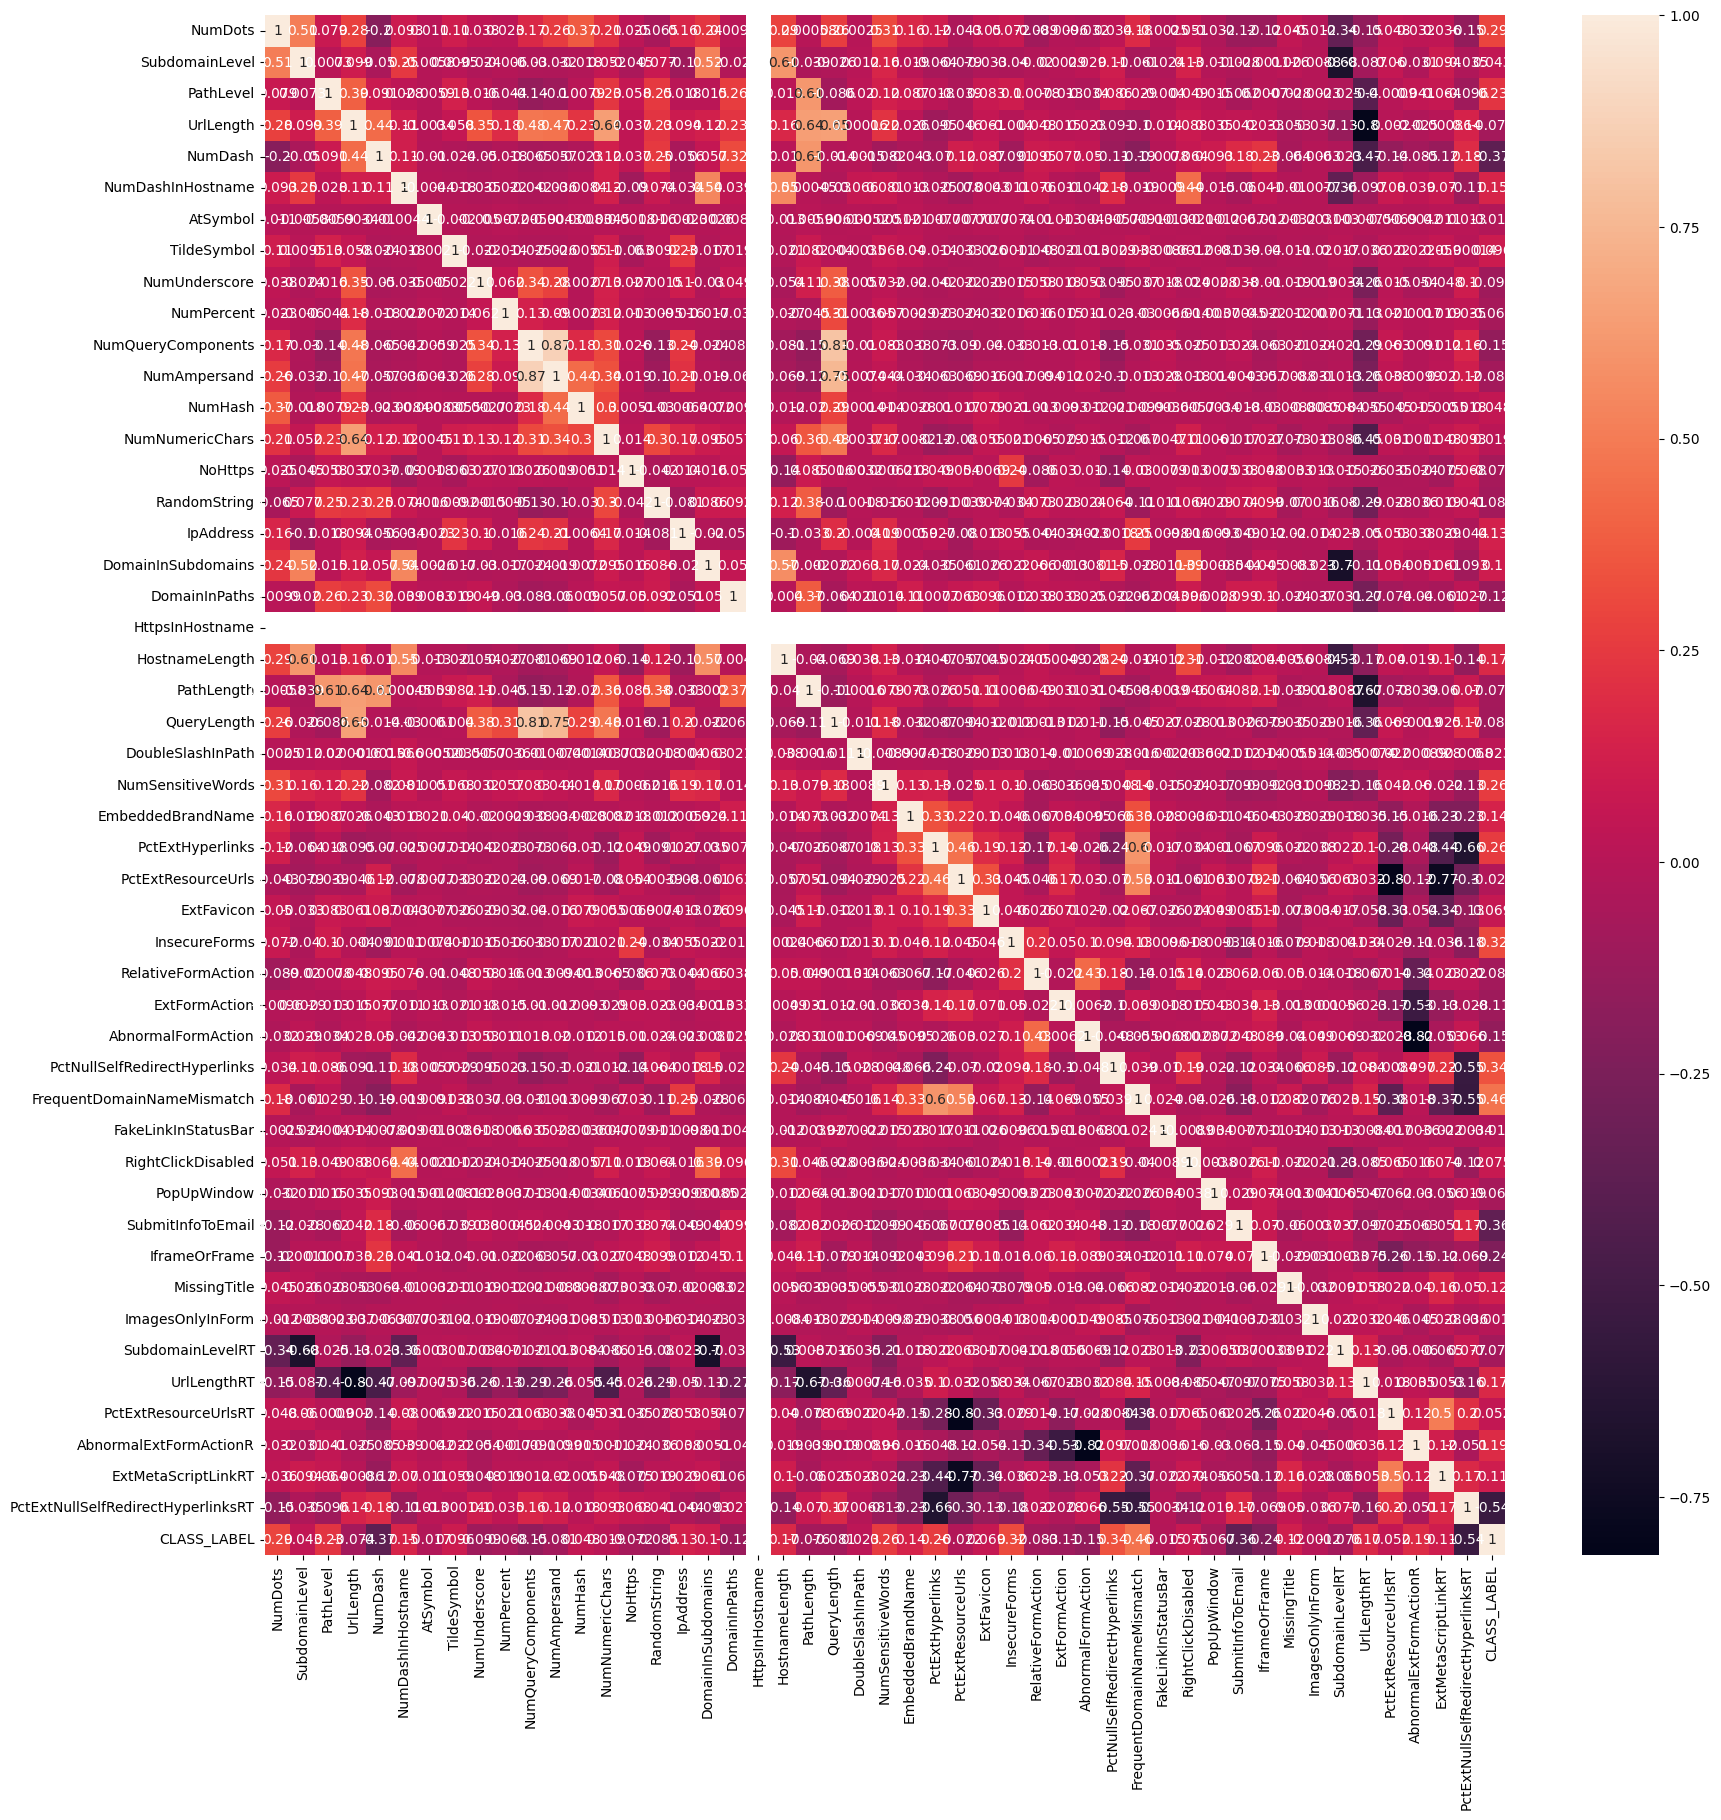

In [40]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

### Distribution of Phishing and Legitimate Sites in Dataset

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


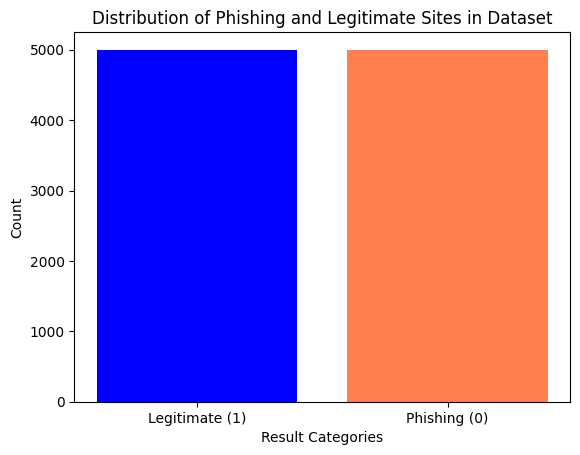

In [41]:
# Count the occurrences of each category in the 'Result' column
result_counts = data1['CLASS_LABEL'].value_counts()
print(data1['CLASS_LABEL'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (1)','Phishing (0)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

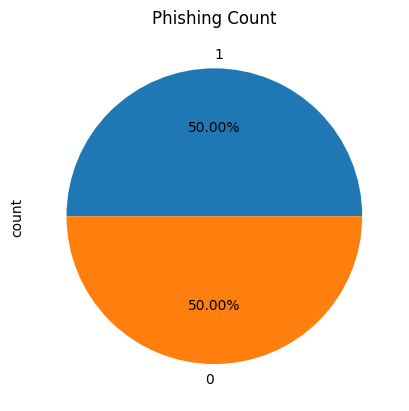

In [42]:
# Phishing Count in pie chart

data1['CLASS_LABEL'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

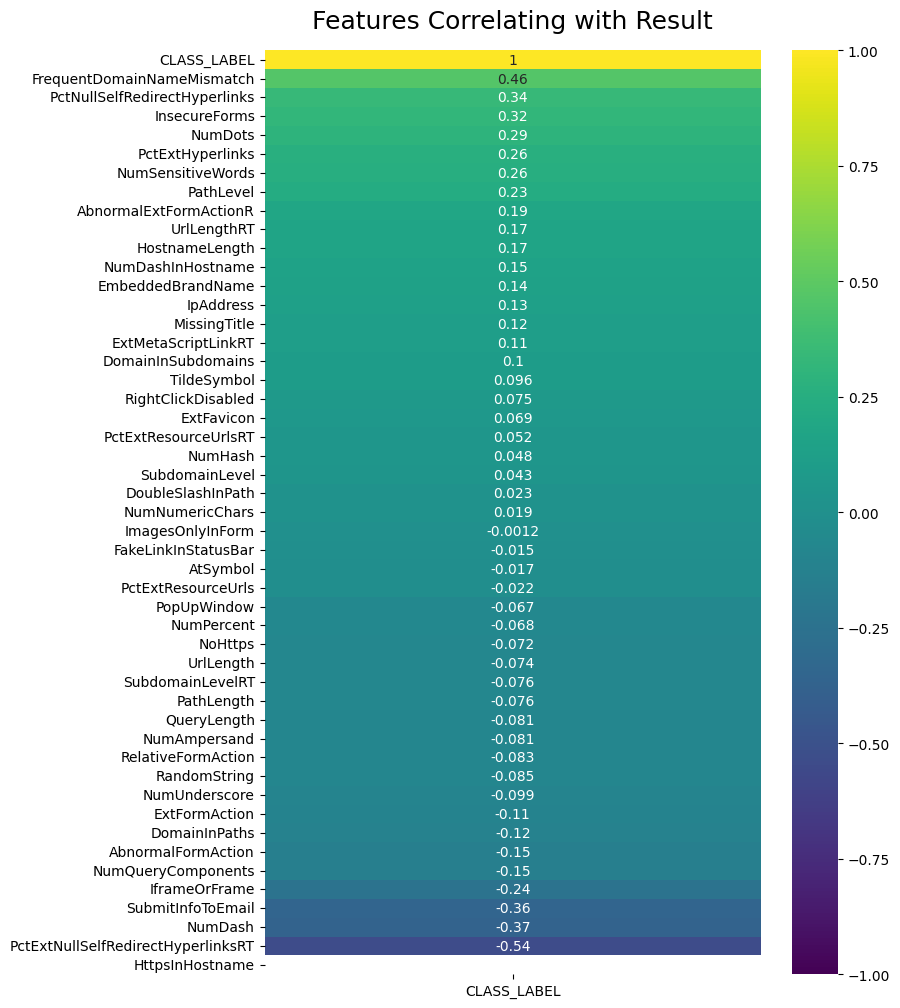

In [43]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data1.corr()[['CLASS_LABEL']].sort_values(by='CLASS_LABEL', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [44]:
# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model,config, a, b, c, d, e):
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

---

# Support Vector Machine Classifier



In [16]:
# Assuming X and y are your features and labels
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')  # Using a linear kernel for feature selection

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [10, 100],  # Add different C values for regularization
    'gamma': [0.1],  # Explore a wider range of gamma values
    'kernel': ['rbf']  # Include additional kernels for non-linear classification
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    # GridSearchCV to find the best parameters for the SVC model
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

    # Fitting the model for grid search with the training data
    svc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_svc_proba = svc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_svc_proba = svc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Support Vector Machine model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_svc),
            metrics.f1_score(y_test, y_test_svc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_svc),
            metrics.recall_score(y_test, y_test_svc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_svc),
            metrics.precision_score(y_test, y_test_svc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_svc_proba),
            metrics.roc_auc_score(y_test, y_test_svc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Support Vector Machine',
                 name,
                 metrics.accuracy_score(y_test, y_test_svc),
                 metrics.f1_score(y_test, y_test_svc),
                 metrics.recall_score(y_test, y_test_svc),
                 metrics.precision_score(y_test, y_test_svc),
                 metrics.roc_auc_score(y_test, y_test_svc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SelectKBest Feature Selection ===


Optimal number of features to select using SelectKBest: 46

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 40

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 17

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Original Data configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training   0.99975  0.999749 1.000000   0.999499 1.000000
    Test   0.87350  0.865497 0.804348   0.936709 0.955896
Best hyperparameters found by GridSearchCV:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Running SVM with Normalized Data configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training     0.989  0.988948 0.987212   0.990689  0.99866
    Test     0.972  0.972522 0.979249   0.965887  0.99575
Best hyperparameters found by GridSearchCV:
{'C': 100, 'gamma': 0.1,

# Random Forest Classifier


In [17]:
# Assuming X and y are your features and labels
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(RandomForestClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with RandomForestClassifier
print("\n=== RFECV Feature Selection with Random Forest ===")
rf_estimator = RandomForestClassifier()

rfecv = RFECV(estimator=rf_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=rf_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run RandomForestClassifier with Hyperparameter Tuning on different configurations
print("\n=== Random Forest Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['log2'],
    'bootstrap': [False],
    'criterion': ['gini', 'entropy']
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Random Forest with {name} configuration...")

    # GridSearchCV to find the best parameters for the RandomForestClassifier
    rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)  # 5-fold cross-validation

    # Fitting the model for grid search with the training data
    rf.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_rf = rf.predict(X_train_cfg)
    y_test_rf = rf.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_rf_proba = rf.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_rf_proba = rf.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Random Forest model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_rf),
            metrics.accuracy_score(y_test, y_test_rf),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_rf),
            metrics.f1_score(y_test, y_test_rf),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_rf),
            metrics.recall_score(y_test, y_test_rf),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_rf),
            metrics.precision_score(y_test, y_test_rf),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_rf_proba),
            metrics.roc_auc_score(y_test, y_test_rf_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nRandom Forest Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Random Forest',
                 name,
                 metrics.accuracy_score(y_test, y_test_rf),
                 metrics.f1_score(y_test, y_test_rf),
                 metrics.recall_score(y_test, y_test_rf),
                 metrics.precision_score(y_test, y_test_rf),
                 metrics.roc_auc_score(y_test, y_test_rf_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(rf.best_params_)


=== SelectKBest Feature Selection ===


Optimal number of features to select using SelectKBest: 42

=== RFECV Feature Selection with Random Forest ===
Optimal number of features selected by RFECV: 38

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 17

=== Random Forest Model Performance with Hyperparameter Tuning ===

Running Random Forest with Original Data configuration...

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training     1.000   1.00000 1.000000   1.000000  1.00000
    Test     0.986   0.98618 0.987154   0.985207  0.99873
Best hyperparameters found by GridSearchCV:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Running Random Forest with Normalized Data configuration...

Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training     1.000   1.00000 1.000000   1.000000 1.0

# Gradient Boosting Classifier

In [18]:
# Assuming X and y are your features and labels
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(GradientBoostingClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with GradientBoostingClassifier
print("\n=== RFECV Feature Selection with Gradient Boosting ===")
gbc_estimator = GradientBoostingClassifier()

rfecv = RFECV(estimator=gbc_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=gbc_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run GradientBoostingClassifier with Hyperparameter Tuning on different configurations
print("\n=== Gradient Boosting Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 6, 7]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning Gradient Boosting with {name} configuration...")

    # GridSearchCV to find the best parameters for the GradientBoostingClassifier
    gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    gbc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_gbc = gbc.predict(X_train_cfg)
    y_test_gbc = gbc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_gbc_proba = gbc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_gbc_proba = gbc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Gradient Boosting model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_gbc),
            metrics.accuracy_score(y_test, y_test_gbc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_gbc),
            metrics.f1_score(y_test, y_test_gbc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_gbc),
            metrics.recall_score(y_test, y_test_gbc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_gbc),
            metrics.precision_score(y_test, y_test_gbc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_gbc_proba),
            metrics.roc_auc_score(y_test, y_test_gbc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nGradient Boosting Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('Gradient Boosting',
                 name,
                 metrics.accuracy_score(y_test, y_test_gbc),
                 metrics.f1_score(y_test, y_test_gbc),
                 metrics.recall_score(y_test, y_test_gbc),
                 metrics.precision_score(y_test, y_test_gbc),
                 metrics.roc_auc_score(y_test, y_test_gbc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(gbc.best_params_)


=== SelectKBest Feature Selection ===


Optimal number of features to select using SelectKBest: 48

=== RFECV Feature Selection with Gradient Boosting ===
Optimal number of features selected by RFECV: 30

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 14

=== Gradient Boosting Model Performance with Hyperparameter Tuning ===

Running Gradient Boosting with Original Data configuration...

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.999875  0.999875 1.000000   0.999749 1.000000
    Test  0.987500  0.987691 0.991107   0.984298 0.999128
Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Running Gradient Boosting with Normalized Data configuration...

Gradient Boosting Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.999875  0.999875 1.000000   0.999749 1.000000
    Test  0.987500  0.987691 0.991107   0.984298 0.999115
Bes

# CatBoost Classifier

In [19]:
# Assuming X and y are your features and labels
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(CatBoostClassifier(silent=True), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with CatBoostClassifier
print("\n=== RFECV Feature Selection with CatBoost ===")
cat_estimator = CatBoostClassifier(silent=True)

rfecv = RFECV(estimator=cat_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=cat_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run CatBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== CatBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1],
    'depth': [6, 8, 10],
    'iterations': [200, 300, 400]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning CatBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the CatBoostClassifier
    cat = GridSearchCV(CatBoostClassifier(silent=True), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    cat.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_cat = cat.predict(X_train_cfg)
    y_test_cat = cat.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_cat_proba = cat.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_cat_proba = cat.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the CatBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_cat),
            metrics.accuracy_score(y_test, y_test_cat),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_cat),
            metrics.f1_score(y_test, y_test_cat),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_cat),
            metrics.recall_score(y_test, y_test_cat),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_cat),
            metrics.precision_score(y_test, y_test_cat),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_cat_proba),
            metrics.roc_auc_score(y_test, y_test_cat_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nCatBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('CatBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_cat),
                 metrics.f1_score(y_test, y_test_cat),
                 metrics.recall_score(y_test, y_test_cat),
                 metrics.precision_score(y_test, y_test_cat),
                 metrics.roc_auc_score(y_test, y_test_cat_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(cat.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 46

=== RFECV Feature Selection with CatBoost ===
Optimal number of features selected by RFECV: 35

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 16

=== CatBoost Model Performance with Hyperparameter Tuning ===

Running CatBoost with Original Data configuration...

CatBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.999625  0.999624 0.999498   0.999749 0.999999
    Test  0.986500  0.986719 0.991107   0.982370 0.998991
Best hyperparameters found by GridSearchCV:
{'depth': 6, 'iterations': 400, 'learning_rate': 0.1}

Running CatBoost with Normalized Data configuration...

CatBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.999625  0.999624 0.999498   0.999749 0.999999
    Test  0.986500  0.986719 0.991107   0.982370 0.998991
Best hyperparameters fou

# AdaBoost Classifier

In [20]:
# Assuming X and y are your features and labels
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(AdaBoostClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with AdaBoostClassifier
print("\n=== RFECV Feature Selection with AdaBoost ===")
ada_estimator = AdaBoostClassifier()

rfecv = RFECV(estimator=ada_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=ada_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run AdaBoostClassifier with Hyperparameter Tuning on different configurations
print("\n=== AdaBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning AdaBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the AdaBoostClassifier
    ada = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    ada.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_ada = ada.predict(X_train_cfg)
    y_test_ada = ada.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_ada_proba = ada.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_ada_proba = ada.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the AdaBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_ada),
            metrics.accuracy_score(y_test, y_test_ada),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_ada),
            metrics.f1_score(y_test, y_test_ada),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_ada),
            metrics.recall_score(y_test, y_test_ada),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_ada),
            metrics.precision_score(y_test, y_test_ada),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_ada_proba),
            metrics.roc_auc_score(y_test, y_test_ada_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nAdaBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('AdaBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_ada),
                 metrics.f1_score(y_test, y_test_ada),
                 metrics.recall_score(y_test, y_test_ada),
                 metrics.precision_score(y_test, y_test_ada),
                 metrics.roc_auc_score(y_test, y_test_ada_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(ada.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 42

=== RFECV Feature Selection with AdaBoost ===
Optimal number of features selected by RFECV: 26

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 13

=== AdaBoost Model Performance with Hyperparameter Tuning ===

Running AdaBoost with Original Data configuration...

AdaBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.981125  0.981094 0.982447   0.979745 0.998968
    Test  0.975000  0.975394 0.979249   0.971569 0.993959
Best hyperparameters found by GridSearchCV:
{'learning_rate': 1.0, 'n_estimators': 200}

Running AdaBoost with Normalized Data configuration...

AdaBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.981125  0.981094 0.982447   0.979745 0.998968
    Test  0.975000  0.975394 0.979249   0.971569 0.993959
Best hyperparameters found by Grid

# XGBoost Classifier

In [21]:
# Assuming X and y are your features and labels
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Feature Selection and PCA after Normalization
# 3.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train))

# 3.2: RFECV with XGBoost
print("\n=== RFECV Feature Selection with XGBoost ===")
xgb_estimator = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

rfecv = RFECV(estimator=xgb_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=xgb_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train))

# 3.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train))

# Step 4: Run XGBoost with Hyperparameter Tuning on different configurations
print("\n=== XGBoost Model Performance with Hyperparameter Tuning ===")

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning XGBoost with {name} configuration...")

    # GridSearchCV to find the best parameters for the XGBoost model
    xgbm = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5)

    # Fitting the model for grid search with the training data
    xgbm.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_xgbm = xgbm.predict(X_train_cfg)
    y_test_xgbm = xgbm.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_xgbm_proba = xgbm.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_xgbm_proba = xgbm.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the XGBoost model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_xgbm),
            metrics.accuracy_score(y_test, y_test_xgbm),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_xgbm),
            metrics.f1_score(y_test, y_test_xgbm),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_xgbm),
            metrics.recall_score(y_test, y_test_xgbm),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_xgbm),
            metrics.precision_score(y_test, y_test_xgbm),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_xgbm_proba),
            metrics.roc_auc_score(y_test, y_test_xgbm_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nXGBoost Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Storing the results, now including the AUC-ROC score
    storeResults('XGBoost',
                 name,
                 metrics.accuracy_score(y_test, y_test_xgbm),
                 metrics.f1_score(y_test, y_test_xgbm),
                 metrics.recall_score(y_test, y_test_xgbm),
                 metrics.precision_score(y_test, y_test_xgbm),
                 metrics.roc_auc_score(y_test, y_test_xgbm_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(xgbm.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 45

=== RFECV Feature Selection with XGBoost ===
Optimal number of features selected by RFECV: 26

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 12

=== XGBoost Model Performance with Hyperparameter Tuning ===

Running XGBoost with Original Data configuration...

XGBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training     0.999  0.998997 0.998746   0.999247 0.999989
    Test     0.990  0.990138 0.992095   0.988189 0.999140
Best hyperparameters found by GridSearchCV:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}

Running XGBoost with Normalized Data configuration...

XGBoost Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training     0.999  0.998997 0.998746   0.999247 0.999989
  

# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [22]:
# Creating the dataframe
result = pd.DataFrame({ 
    'ML Model' : ML_Model,
    'Configuration': ML_Config,
    'Accuracy' : [f"{acc * 100:.3f}%" for acc in accuracy],
    'F1 Score' : [f"{f1 * 100:.3f}%" for f1 in f1_score],
    'Recall'   : [f"{rec * 100:.3f}%" for rec in recall],
    'Precision': [f"{prec * 100:.3f}%" for prec in precision],
    'ROC_AUC'  : [f"{roc * 100:.3f}%" for roc in auc_roc],
})

# Displaying the result
print(result)

# Saving the result to a CSV file
result.to_csv('model_results6.csv', index=False)

# Sorting the dataframe on accuracy and F1 Score
sorted_result = result.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)

# Displaying the sorted result
print(sorted_result)

# Saving the sorted result to a CSV file
sorted_result.to_csv('sorted_model_results6.csv', index=False)

                  ML Model    Configuration Accuracy F1 Score   Recall  \
0   Support Vector Machine    Original Data  87.350%  86.550%  80.435%   
1   Support Vector Machine  Normalized Data  97.200%  97.252%  97.925%   
2   Support Vector Machine      SelectKBest  97.250%  97.300%  97.925%   
3   Support Vector Machine            RFECV  97.300%  97.345%  97.826%   
4   Support Vector Machine              PCA  94.450%  94.551%  95.158%   
5            Random Forest    Original Data  98.600%  98.618%  98.715%   
6            Random Forest  Normalized Data  98.600%  98.618%  98.715%   
7            Random Forest      SelectKBest  98.500%  98.519%  98.617%   
8            Random Forest            RFECV  98.400%  98.419%  98.419%   
9            Random Forest              PCA  95.800%  95.817%  95.059%   
10       Gradient Boosting    Original Data  98.750%  98.769%  99.111%   
11       Gradient Boosting  Normalized Data  98.750%  98.769%  99.111%   
12       Gradient Boosting      Select

# ensemble

In [23]:
# Written by Ovi
# Date: 2024-09-06
# This script builds a stacking ensemble model with XGBoost, RandomForest, CatBoost as base learners, and Gradient Boosting as the meta-learner using the provided hyperparameters, along with RFECV feature selection for the meta-learner.

import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV

# Assuming the dataset is pre-loaded into 'data1'
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Normalize the data for base models
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest for meta-learner
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train_normalized.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(GradientBoostingClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features for meta-learner
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]

# RFECV Feature Selection with Gradient Boosting for meta-learner
print("\n=== RFECV Feature Selection with Gradient Boosting ===")
gbc_estimator = GradientBoostingClassifier()
rfecv = RFECV(estimator=gbc_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

# Apply RFECV transformation to get the best features for the meta learner
X_train_rfe = rfecv.transform(X_train_kbest)
X_test_rfe = rfecv.transform(X_test_kbest)

# Step 4: Define base models (XGBoost, RandomForest, CatBoost) with hyperparameters
base_learners = [
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                              learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0),
     X_train_normalized, X_test_normalized),
    
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
     X_train_normalized, X_test_normalized),
    
    ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True), 
     X_train_normalized, X_test_normalized)
]

# Meta-learner: GradientBoosting using the RFECV selected features with provided hyperparameters
meta_learner = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400)

# Step 5: Stack the base learners and meta learner
class StackingModel:
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions to use as features for the meta learner
        stacked_predictions = np.hstack(self.base_predictions)
        print("Fitting meta learner with RFECV-selected features")
        self.meta_learner.fit(X_train_rfe, y_train)  # Use the RFECV-transformed features for the meta-learner

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack the predictions from base learners for test data
        stacked_predictions_test = np.hstack(base_predictions_test)
        return self.meta_learner.predict(X_test_rfe)  # Use RFECV-transformed test data for meta-learner prediction

# Step 6: Initialize and train the stacking model
stacking_model = StackingModel(base_learners, meta_learner)
stacking_model.fit(y_train)

# Step 7: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")

# Step 9: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results.csv", index=False)
print("Results saved to 'stacking_model_results.csv'")


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 47

=== RFECV Feature Selection with Gradient Boosting ===
Fitting base learner: xgb
Fitting base learner: rf
Fitting base learner: cat
Fitting meta learner with RFECV-selected features
Predicting with base learner: xgb
Predicting with base learner: rf
Predicting with base learner: cat
Accuracy: 0.99
F1 Score: 0.9901477832512317
Precision: 0.9872298624754421
Recall: 0.9930830039525692
AUC-ROC: 0.9899625546078636
Results saved to 'stacking_model_results.csv'


# new approach

In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV

# Assuming the dataset is pre-loaded into 'data1'
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Normalize the data for base models
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [46]:
# Step 3: Feature Selection using SelectKBest for meta-learner
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train_normalized.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
    score = cross_val_score(GradientBoostingClassifier(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features for meta-learner
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_normalized, y_train)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]

# RFECV Feature Selection with Gradient Boosting for meta-learner
print("\n=== RFECV Feature Selection with Gradient Boosting ===")
gbc_estimator = GradientBoostingClassifier()
rfecv = RFECV(estimator=gbc_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

# Apply RFECV transformation to get the best features for the meta learner
X_train_rfe = rfecv.transform(X_train_kbest)
X_test_rfe = rfecv.transform(X_test_kbest)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 48

=== RFECV Feature Selection with Gradient Boosting ===


In [47]:
# Step 4: Define base models (XGBoost, RandomForest, CatBoost) with hyperparameters
base_learners = [
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                              learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0),
     X_train_normalized, X_test_normalized),
    
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
     X_train_normalized, X_test_normalized),
    
    ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True), 
     X_train_normalized, X_test_normalized)
]

# Meta-learner: GradientBoosting using the RFECV selected features with provided hyperparameters
meta_learner = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400)

# Step 5: Stack the base learners and meta learner
class StackingModel:
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions to use as features for the meta learner
        stacked_predictions = np.hstack(self.base_predictions)
        print("Fitting meta learner with RFECV-selected features")
        self.meta_learner.fit(X_train_rfe, y_train)  # Use the RFECV-transformed features for the meta-learner

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack the predictions from base learners for test data
        stacked_predictions_test = np.hstack(base_predictions_test)
        return self.meta_learner.predict(X_test_rfe)  # Use RFECV-transformed test data for meta-learner prediction

# Step 6: Initialize and train the stacking model
stacking_model = StackingModel(base_learners, meta_learner)
stacking_model.fit(y_train)

# Step 7: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")

# Step 9: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results.csv", index=False)
print("Results saved to 'stacking_model_results.csv'")

Fitting base learner: xgb
Fitting base learner: rf
Fitting base learner: cat
Fitting meta learner with RFECV-selected features
Predicting with base learner: xgb
Predicting with base learner: rf
Predicting with base learner: cat
Accuracy: 0.9905
F1 Score: 0.9906450024618414
Precision: 0.9872423945044161
Recall: 0.9940711462450593
AUC-ROC: 0.9904566257541085
Results saved to 'stacking_model_results.csv'


In [53]:
# Step 4: Define base models (XGBoost, RandomForest, CatBoost) with hyperparameters
from sklearn.svm import SVC  # Import SVM classifier

# Define base models (XGBoost, RandomForest, SVM)
base_learners = [
    # XGBoost using normalized data
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                              learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0),
     X_train_normalized, X_test_normalized),
    
    # RandomForest using normalized data
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
     X_train_normalized, X_test_normalized),
    
    # SVM with specified hyperparameters using normalized data
    ('svm', SVC(kernel='rbf', C=100, gamma=0.1, probability=True),  # RBF kernel, C=100, gamma=0.1
     X_train_rfe_svm, X_test_rfe_svm)
]

# Meta-learner: GradientBoosting using the RFECV selected features with provided hyperparameters
meta_learner = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400)

# Step 5: Stack the base learners and meta learner
class StackingModel:
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions to use as features for the meta learner
        stacked_predictions = np.hstack(self.base_predictions)
        print("Fitting meta learner with RFECV-selected features")
        self.meta_learner.fit(X_train_rfe, y_train)  # Use the RFECV-transformed features for the meta-learner

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack the predictions from base learners for test data
        stacked_predictions_test = np.hstack(base_predictions_test)
        return self.meta_learner.predict(X_test_rfe)  # Use RFECV-transformed test data for meta-learner prediction

# Step 6: Initialize and train the stacking model
stacking_model = StackingModel(base_learners, meta_learner)
stacking_model.fit(y_train)

# Step 7: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")

# Step 9: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results.csv", index=False)
print("Results saved to 'stacking_model_results.csv'")

Fitting base learner: xgb
Fitting base learner: rf
Fitting base learner: svm
Fitting meta learner with RFECV-selected features
Predicting with base learner: xgb
Predicting with base learner: rf
Predicting with base learner: svm
Accuracy: 0.9905
F1 Score: 0.9906450024618414
Precision: 0.9872423945044161
Recall: 0.9940711462450593
AUC-ROC: 0.9904566257541085
Results saved to 'stacking_model_results.csv'


---

In [66]:
# Step 4: Define base models (XGBoost, RandomForest, CatBoost) with hyperparameters
from sklearn.svm import SVC  # Import SVM classifier

# Define base models (XGBoost, RandomForest, SVM)
base_learners = [
    # # # XGBoost using normalized data
    # # ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
    # #                           learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0),
    #  X_train_normalized, X_test_normalized),
    
    # RandomForest using normalized data
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
     X_train_normalized, X_test_normalized),
    
    # SVM with specified hyperparameters using normalized data
    ('svm', SVC(kernel='rbf', C=100, gamma=0.1, probability=True),  # RBF kernel, C=100, gamma=0.1
     X_train_rfe_svm, X_test_rfe_svm)
]

# Meta-learner: GradientBoosting using the RFECV selected features with provided hyperparameters
meta_learner = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400)

# Step 5: Stack the base learners and meta learner
class StackingModel:
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions to use as features for the meta learner
        stacked_predictions = np.hstack(self.base_predictions)
        print("Fitting meta learner with RFECV-selected features")
        self.meta_learner.fit(X_train_rfe, y_train)  # Use the RFECV-transformed features for the meta-learner

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack the predictions from base learners for test data
        stacked_predictions_test = np.hstack(base_predictions_test)
        return self.meta_learner.predict(X_test_rfe)  # Use RFECV-transformed test data for meta-learner prediction

# Step 6: Initialize and train the stacking model
stacking_model = StackingModel(base_learners, meta_learner)
stacking_model.fit(y_train)

# Step 7: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")

# Step 9: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results.csv", index=False)
print("Results saved to 'stacking_model_results.csv'")

Fitting base learner: rf
Fitting base learner: svm
Fitting meta learner with RFECV-selected features
Predicting with base learner: rf
Predicting with base learner: svm
Accuracy: 0.9905
F1 Score: 0.9906450024618414
Precision: 0.9872423945044161
Recall: 0.9940711462450593
AUC-ROC: 0.9904566257541085
Results saved to 'stacking_model_results.csv'


In [68]:

# Step 2: Define base models (CatBoost, AdaBoost) with hyperparameters
base_learners = [
    # CatBoost using normalized data
    ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True), 
     X_train_normalized, X_test_normalized),
    
    # AdaBoost using normalized data
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1), 
     X_train_normalized, X_test_normalized)
]

# Step 3: Meta-learner: XGBoost using normalized data
meta_learner = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                                 learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0)

# Step 4: Stack the base learners and meta learner
class StackingModel:
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions to use as features for the meta learner
        stacked_predictions = np.hstack(self.base_predictions)
        print("Fitting meta learner")
        self.meta_learner.fit(stacked_predictions, y_train)  # Use stacked base learner predictions for the meta-learner

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack the predictions from base learners for test data
        stacked_predictions_test = np.hstack(base_predictions_test)
        return self.meta_learner.predict(stacked_predictions_test)  # Use stacked test data for meta-learner prediction

# Step 5: Initialize and train the stacking model
stacking_model = StackingModel(base_learners, meta_learner)
stacking_model.fit(y_train)

# Step 6: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 7: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 8: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results.csv", index=False)
print("Results saved to 'stacking_model_results.csv'")

Fitting base learner: cat
Fitting base learner: ada
Fitting meta learner
Predicting with base learner: cat
Predicting with base learner: ada
Accuracy: 0.9850
F1 Score: 0.9852
Precision: 0.9833
Recall: 0.9872
AUC-ROC: 0.9850
Results saved to 'stacking_model_results.csv'


In [72]:
# Step 2: Replace custom StackingModel with scikit-learn's StackingClassifier

# Stacking Model 1: RandomForest, SVM, and Gradient Boosting as meta-learner
stack_1 = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                      min_samples_leaf=1, min_samples_split=2, n_estimators=200)),
        ('svm', SVC(kernel='rbf', C=100, gamma=0.1, probability=True))
    ],
    final_estimator=GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400),
    cv=5  # Cross-validation
)

# Stacking Model 2: CatBoost, AdaBoost, and XGBoost as meta-learner
stack_2 = StackingClassifier(
    estimators=[
        ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True)),
        ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1))
    ],
    final_estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                                      learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0),
    cv=5  # Cross-validation
)

# Step 3: Voting Classifier to combine both stacking models
voting_clf = VotingClassifier(
    estimators=[
        ('stacking_1', stack_1),
        ('stacking_2', stack_2)
    ],
    voting='soft'  # Soft voting to average predicted probabilities
)

# Step 4: Cross-validate the Voting Classifier
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(voting_clf, X_train_normalized, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validated Accuracy: {cross_val_scores.mean():.4f}")

# Step 5: Train the Voting Classifier on the entire training set
voting_clf.fit(X_train_normalized, y_train)

# Step 6: Make predictions on the test set
y_test_pred = voting_clf.predict(X_test_normalized)

# Step 7: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 8: Save the results to a CSV file
results_dict = {
    'Cross-validated Accuracy': [cross_val_scores.mean()],
    'Test Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("voting_with_stacking_results.csv", index=False)
print("Results saved to 'voting_with_stacking_results.csv'")

Cross-validated Accuracy: 0.9826
Test Accuracy: 0.9870
F1 Score: 0.9872
Precision: 0.9843
Recall: 0.9901
AUC-ROC: 0.9870
Results saved to 'voting_with_stacking_results.csv'


In [ ]:
# Step 7: Define the voting classifier to combine both stacking models
from sklearn.ensemble import VotingClassifier

# Assuming stacking_model_1 and stacking_model_2 are already trained using previous steps
voting_clf = VotingClassifier(
    estimators=[
        ('stacking_1', stacking_model_1),
        ('stacking_2', stacking_model_2)
    ],
    voting='soft'  # You can also use 'hard' depending on the problem
)

# Step 8: Apply Cross-Validation for the Voting Classifier
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(voting_clf, X_train_normalized, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validated Accuracy: {cross_val_scores.mean():.4f}")

# Step 9: Train the VotingClassifier on the entire training set
print("Training Voting Classifier with Stacking Models...")
voting_clf.fit(X_train_normalized, y_train)

# Step 10: Make predictions on the test set
y_test_pred = voting_clf.predict(X_test_normalized)

# Step 11: Calculate test metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 12: Save the results to a CSV file
results_dict = {
    'Cross-validated Accuracy': [cross_val_scores.mean()],
    'Test Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("voting_with_stacking_results.csv", index=False)
print("Results saved to 'voting_with_stacking_results.csv'")

In [48]:
# Written by Ovi
# Date: 2024-09-06
# This script builds a stacking ensemble model with XGBoost, RandomForest, CatBoost, AdaBoost, and SVM as base learners, 
# and Gradient Boosting as the meta-learner using the provided hyperparameters, along with RFECV feature selection for the meta-learner.

import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV

# Assuming the dataset is pre-loaded into 'data1'
X = data1.drop(["CLASS_LABEL"], axis=1)
y = data1["CLASS_LABEL"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Normalize the data for base models
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [49]:
# Step 3.1: Feature Selection using SelectKBest for Gradient Boosting
print("\n=== SelectKBest Feature Selection for Gradient Boosting ===")
scores_gb = []
for k in range(1, X_train_normalized.shape[1] + 1):  # Loop through possible numbers of features for Gradient Boosting
    kbest_gb = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest_gb = kbest_gb.fit_transform(X_train_normalized, y_train)
    score_gb = cross_val_score(GradientBoostingClassifier(), X_train_kbest_gb, y_train, cv=5, scoring='accuracy').mean()
    scores_gb.append(score_gb)

# Identify the optimal number of features for Gradient Boosting
optimal_k_gb = scores_gb.index(max(scores_gb)) + 1
print(f"Optimal number of features to select using SelectKBest for Gradient Boosting: {optimal_k_gb}")

# Apply SelectKBest with the optimal number of features for Gradient Boosting
kbest_gb = SelectKBest(score_func=f_classif, k=optimal_k_gb)
X_train_kbest_gb = kbest_gb.fit_transform(X_train_normalized, y_train)
X_test_kbest_gb = kbest_gb.transform(X_test_normalized)  # Apply the same transformation to X_test

# Step 3.2: RFECV Feature Selection with Gradient Boosting
print("\n=== RFECV Feature Selection with Gradient Boosting ===")
gbc_estimator = GradientBoostingClassifier()
rfecv_gb = RFECV(estimator=gbc_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv_gb.fit(X_train_kbest_gb, y_train)

# Apply RFECV transformation to get the best features for Gradient Boosting
X_train_rfe_gb = rfecv_gb.transform(X_train_kbest_gb)
X_test_rfe_gb = rfecv_gb.transform(X_test_kbest_gb)
print(f"Optimal number of features selected by RFECV for Gradient Boosting: {rfecv_gb.n_features_}")

# Step 3.3: Feature Selection using SelectKBest for SVM
print("\n=== SelectKBest Feature Selection for SVM ===")
scores_svm = []
for k in range(1, X_train_normalized.shape[1] + 1):  # Loop through possible numbers of features for SVM
    kbest_svm = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest_svm = kbest_svm.fit_transform(X_train_normalized, y_train)
    score_svm = cross_val_score(SVC(kernel='linear'), X_train_kbest_svm, y_train, cv=5, scoring='accuracy').mean()
    scores_svm.append(score_svm)

# Identify the optimal number of features for SVM
optimal_k_svm = scores_svm.index(max(scores_svm)) + 1
print(f"Optimal number of features to select using SelectKBest for SVM: {optimal_k_svm}")

# Apply SelectKBest with the optimal number of features for SVM
kbest_svm = SelectKBest(score_func=f_classif, k=optimal_k_svm)
X_train_kbest_svm = kbest_svm.fit_transform(X_train_normalized, y_train)
X_test_kbest_svm = kbest_svm.transform(X_test_normalized)  # Apply the same transformation to X_test

# Step 3.4: RFECV Feature Selection with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')
rfecv_svm = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv_svm.fit(X_train_kbest_svm, y_train)

# Apply RFECV transformation to get the best features for SVM
X_train_rfe_svm = rfecv_svm.transform(X_train_kbest_svm)
X_test_rfe_svm = rfecv_svm.transform(X_test_kbest_svm)
print(f"Optimal number of features selected by RFECV for SVM: {rfecv_svm.n_features_}")


=== SelectKBest Feature Selection for Gradient Boosting ===
Optimal number of features to select using SelectKBest for Gradient Boosting: 47

=== RFECV Feature Selection with Gradient Boosting ===
Optimal number of features selected by RFECV for Gradient Boosting: 44

=== SelectKBest Feature Selection for SVM ===
Optimal number of features to select using SelectKBest for SVM: 46

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV for SVM: 40


In [59]:
# Step 4: Define base models (XGBoost, RandomForest, CatBoost, AdaBoost, and SVM) with hyperparameters
base_learners = [
    # XGBoost using normalized data
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0),
    X_train_normalized, X_test_normalized),
    
    # RandomForest using normalized data
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
    X_train_normalized, X_test_normalized),
    
    # CatBoost using normalized data
    ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True), 
    X_train_normalized, X_test_normalized),

    # AdaBoost using normalized data
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1), 
    X_train_normalized, X_test_normalized),

    # SVM using RFECV-selected features (from step 3.4)
    ('svm', SVC(kernel='rbf',C=100, gamma= 0.1,probability=True), 
    X_train_rfe_svm, X_test_rfe_svm)
]

# Meta-learner: GradientBoosting using the RFECV-selected features for Gradient Boosting
meta_learner = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400)

In [61]:
#Step 5: Stack the base learners and meta learner
class StackingModel:
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions to use as features for the meta learner
        stacked_predictions = np.hstack(self.base_predictions)
        print("Fitting meta learner with RFECV-selected features")
        self.meta_learner.fit(X_train_rfe, y_train)  # Use the RFECV-transformed features for the meta-learner

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack the predictions from base learners for test data
        stacked_predictions_test = np.hstack(base_predictions_test)
        return self.meta_learner.predict(X_test_rfe)  # Use RFECV-transformed test data for meta-learner prediction

# Step 6: Initialize and train the stacking model
stacking_model = StackingModel(base_learners, meta_learner)
stacking_model.fit(y_train)

# Step 7: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 9: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results_with_ada_svm.csv", index=False)
print("Results saved to 'stacking_model_results_with_ada_svm.csv'")

Fitting base learner: xgb
Fitting base learner: rf
Fitting base learner: cat
Fitting base learner: ada
Fitting base learner: svm
Fitting meta learner with RFECV-selected features
Predicting with base learner: xgb
Predicting with base learner: rf
Predicting with base learner: cat
Predicting with base learner: ada
Predicting with base learner: svm
Accuracy: 0.9905
F1 Score: 0.9906
Precision: 0.9872
Recall: 0.9941
AUC-ROC: 0.9905
Results saved to 'stacking_model_results_with_ada_svm.csv'


In [60]:
# Step 5: Stack base learner predictions with RFECV-selected features for the meta-learner
class StackingModel:
    def __init__(self, base_learners, meta_learner, rfecv_features_train, rfecv_features_test):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.rfecv_features_train = rfecv_features_train  # RFECV-selected features (train)
        self.rfecv_features_test = rfecv_features_test    # RFECV-selected features (test)
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions and concatenate RFECV-selected features
        stacked_predictions = np.hstack(self.base_predictions)
        final_train_features = np.hstack((stacked_predictions, self.rfecv_features_train))  # Combine stacked predictions and RFECV features
        print("Fitting meta learner with stacked predictions and RFECV-selected features")
        self.meta_learner.fit(final_train_features, y_train)

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions and concatenate RFECV-selected features
        stacked_predictions_test = np.hstack(base_predictions_test)
        final_test_features = np.hstack((stacked_predictions_test, self.rfecv_features_test))  # Combine stacked predictions and RFECV features
        return self.meta_learner.predict(final_test_features)

# Assuming that RFECV has been performed and you have these variables:
# X_train_rfe (RFECV-selected features from the training set)
# X_test_rfe (RFECV-selected features from the test set)

# Step 6: Initialize and train the stacking model using stacked predictions
stacking_model = StackingModel(base_learners, meta_learner, X_train_rfe, X_test_rfe)  # Pass RFECV-selected features
stacking_model.fit(y_train)

# Step 7: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 9: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results_with_ada_svm.csv", index=False)
print("Results saved to 'stacking_model_results_with_ada_svm.csv'")

Fitting base learner: xgb
Fitting base learner: rf
Fitting base learner: cat
Fitting base learner: ada
Fitting base learner: svm
Fitting meta learner with stacked predictions and RFECV-selected features
Predicting with base learner: xgb
Predicting with base learner: rf
Predicting with base learner: cat
Predicting with base learner: ada
Predicting with base learner: svm
Accuracy: 0.9875
F1 Score: 0.9877
Precision: 0.9862
Recall: 0.9891
AUC-ROC: 0.9875
Results saved to 'stacking_model_results_with_ada_svm.csv'


In [54]:
# Step 4: Define base models (XGBoost, RandomForest, CatBoost, AdaBoost, GradientBoosting) with hyperparameters
base_learners = [
    # XGBoost using normalized data
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                              learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0),
    X_train_normalized, X_test_normalized),
    
    # RandomForest using normalized data
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=200), 
    X_train_normalized, X_test_normalized),
    
    # GradientBoosting using RFECV-selected features
    ('gb', GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400), 
    X_train_rfe_gb, X_test_rfe_gb),

    # AdaBoost using normalized data
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1), 
    X_train_normalized, X_test_normalized),

    # CatBoost using normalized data
    ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True), 
    X_train_normalized, X_test_normalized)
]

# Meta-learner: SVM using RFECV-selected features for meta-learning
meta_learner = SVC(kernel='rbf', C=100, gamma=0.1, probability=True)

# Step 5: Stack the base learners and meta-learner
class StackingModel:
    def __init__(self, base_learners, meta_learner):
        self.base_learners = base_learners
        self.meta_learner = meta_learner
        self.base_predictions = []

    def fit(self, y_train):
        # Fit base learners
        for name, model, X_train_b, _ in self.base_learners:
            print(f"Fitting base learner: {name}")
            model.fit(X_train_b, y_train)
            self.base_predictions.append(model.predict_proba(X_train_b)[:, 1].reshape(-1, 1))

        # Stack base learner predictions to use as features for the meta-learner
        stacked_predictions = np.hstack(self.base_predictions)
        print("Fitting meta learner (SVM) with RFECV-selected features")
        self.meta_learner.fit(stacked_predictions, y_train)

    def predict(self):
        base_predictions_test = []
        for i, (name, model, _, X_test_b) in enumerate(self.base_learners):
            print(f"Predicting with base learner: {name}")
            base_predictions_test.append(model.predict_proba(X_test_b)[:, 1].reshape(-1, 1))

        # Stack the predictions from base learners for test data
        stacked_predictions_test = np.hstack(base_predictions_test)
        return self.meta_learner.predict(stacked_predictions_test)  # SVM making predictions based on stacked data

# Step 6: Initialize and train the stacking model
stacking_model = StackingModel(base_learners, meta_learner)
stacking_model.fit(y_train)

# Step 7: Make predictions on the test set using the stacking model
y_test_pred = stacking_model.predict()

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 9: Save the results
results_dict = {
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("stacking_model_results_with_svm_meta.csv", index=False)
print("Results saved to 'stacking_model_results_with_svm_meta.csv'")

Fitting base learner: xgb
Fitting base learner: rf
Fitting base learner: gb
Fitting base learner: ada
Fitting base learner: cat
Fitting meta learner (SVM) with RFECV-selected features
Predicting with base learner: xgb
Predicting with base learner: rf
Predicting with base learner: gb
Predicting with base learner: ada
Predicting with base learner: cat
Accuracy: 0.9895
F1 Score: 0.9896
Precision: 0.9882
Recall: 0.9911
AUC-ROC: 0.9895
Results saved to 'stacking_model_results_with_svm_meta.csv'


In [62]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 2: Define the base models for the first stack (RandomForest, CatBoost) and use Gradient Boosting as meta-learner
base_learners_1 = [
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=200)),
    ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True))
]

meta_learner_1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400)

# First Stacking Classifier
stacking_clf_1 = StackingClassifier(
    estimators=base_learners_1,
    final_estimator=meta_learner_1,
    stack_method='predict_proba'
)

# Step 3: Define the base models for the second stack (AdaBoost, SVM) and use XGBoost as meta-learner
base_learners_2 = [
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1)),
    ('svm', SVC(kernel='rbf', C=100, gamma=0.1, probability=True))
]

meta_learner_2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                                   learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0)

# Second Stacking Classifier
stacking_clf_2 = StackingClassifier(
    estimators=base_learners_2,
    final_estimator=meta_learner_2,
    stack_method='predict_proba'
)

# Step 4: Combine the two stacking models using Voting
voting_clf = VotingClassifier(
    estimators=[
        ('stacking_1', stacking_clf_1),
        ('stacking_2', stacking_clf_2)
    ],
    voting='soft'  # Use soft voting for predicted probabilities
)

# Step 5: Train the hybrid ensemble model (voting over two stacked models)
voting_clf.fit(X_train_normalized, y_train)

# Step 6: Make predictions on the test set
y_test_pred = voting_clf.predict(X_test_normalized)

# Step 7: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Step 8: Display evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 9: Save the results to a CSV file
results_dict = {
    'Test Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("voting_stacked_model_results.csv", index=False)
print("Results saved to 'voting_stacked_model_results.csv'")

Test Accuracy: 0.9860
F1 Score: 0.9862
Precision: 0.9824
Recall: 0.9901
AUC-ROC: 0.9859
Results saved to 'voting_stacked_model_results.csv'


In [63]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV


# Step 3: Define the base models for the first stack (RandomForest, CatBoost) and use GradientBoosting as the meta-learner
base_learners_1 = [
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=40, max_features='log2',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=200)),
    ('cat', CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, silent=True))
]

# Use Gradient Boosting with RFECV-selected features as the meta-learner
meta_learner_1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=400)

# First Stacking Classifier
stacking_clf_1 = StackingClassifier(
    estimators=base_learners_1,
    final_estimator=meta_learner_1,
    stack_method='predict_proba'
)

# Step 4: Define the base models for the second stack (AdaBoost, SVM) and use XGBoost as the meta-learner
base_learners_2 = [
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1)),
    ('svm', SVC(kernel='rbf', C=100, gamma=0.1, probability=True))
]

# Use XGBoost as the meta-learner for the second stack
meta_learner_2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', colsample_bytree=0.8, gamma=0.1,
                                   learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0)

# Second Stacking Classifier
stacking_clf_2 = StackingClassifier(
    estimators=base_learners_2,
    final_estimator=meta_learner_2,
    stack_method='predict_proba'
)

# Step 5: Combine the two stacking models using Voting
voting_clf = VotingClassifier(
    estimators=[
        ('stacking_1', stacking_clf_1),
        ('stacking_2', stacking_clf_2)
    ],
    voting='soft'  # Use soft voting for predicted probabilities
)

# Step 6: Train the hybrid ensemble model (voting over two stacked models)
voting_clf.fit(X_train_normalized, y_train)

# Step 7: Make predictions on the test set
y_test_pred = voting_clf.predict(X_test_normalized)

# Step 8: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Step 9: Display evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Step 10: Save the results to a CSV file
results_dict = {
    'Test Accuracy': [accuracy],
    'F1 Score': [f1],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [roc_auc]
}

df_results = pd.DataFrame(results_dict)
df_results.to_csv("voting_stacked_model_results_with_rfe_svm_gb.csv", index=False)
print("Results saved to 'voting_stacked_model_results_with_rfe_svm_gb.csv'")

Test Accuracy: 0.9860
F1 Score: 0.9862
Precision: 0.9814
Recall: 0.9911
AUC-ROC: 0.9859
Results saved to 'voting_stacked_model_results_with_rfe_svm_gb.csv'
